In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load and process datasets
workout_df = pd.read_csv("data/workout_clean.csv")
three_keywords_df = pd.read_csv("data/three_keywords_clean.csv")

In [17]:
workout_df.head()

,week,region,interest
0,2018-03-18,workout: (Worldwide),59.0
1,2018-03-25,workout: (Worldwide),58.0
2,2018-04-01,workout: (Worldwide),61.0
3,2018-04-08,workout: (Worldwide),57.0
4,2018-04-15,workout: (Worldwide),59.0


In [18]:
three_keywords_df.head()

,week,region,interest
0,2018-03-18,home workout: (Worldwide),12.0
1,2018-03-18,gym workout: (Worldwide),16.0
2,2018-03-18,home gym: (Worldwide),10.0
3,2018-03-25,home workout: (Worldwide),13.0
4,2018-03-25,gym workout: (Worldwide),17.0


## The overarching global fitness trends over time

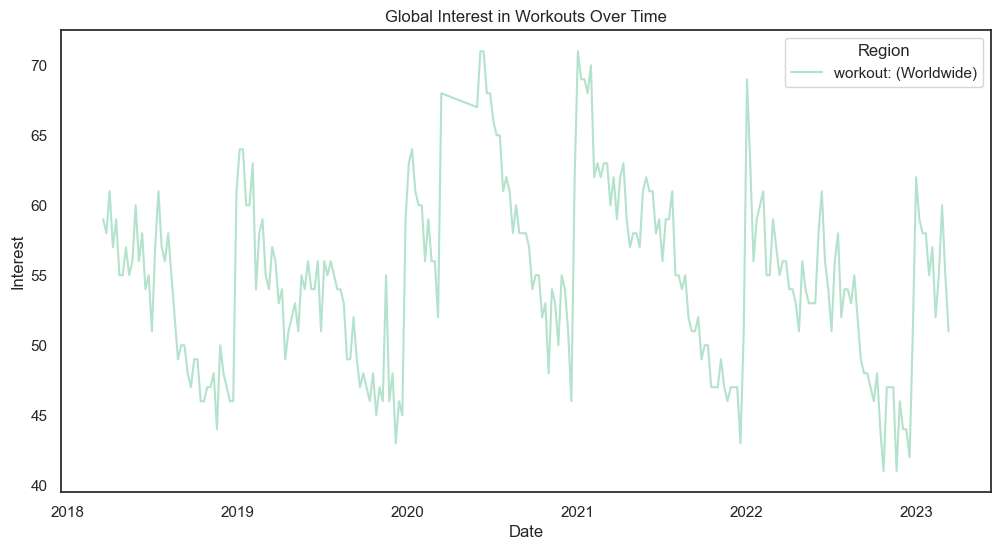

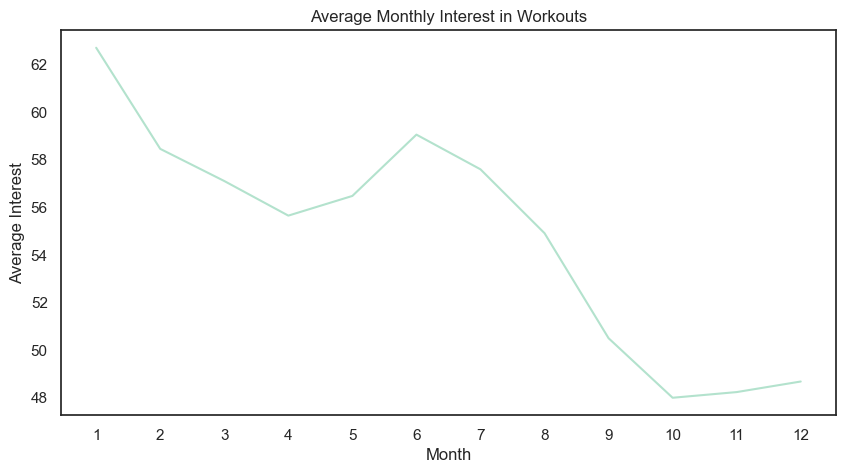

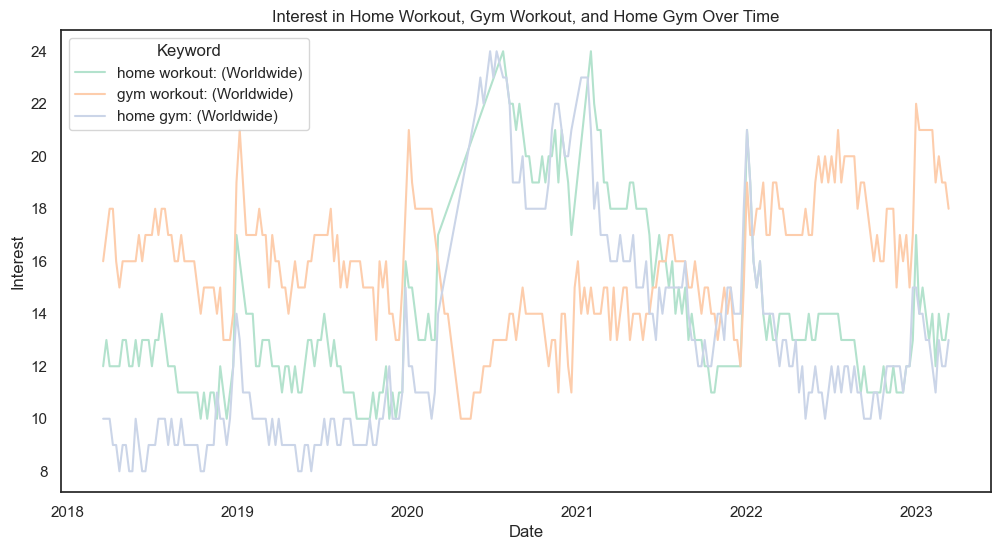

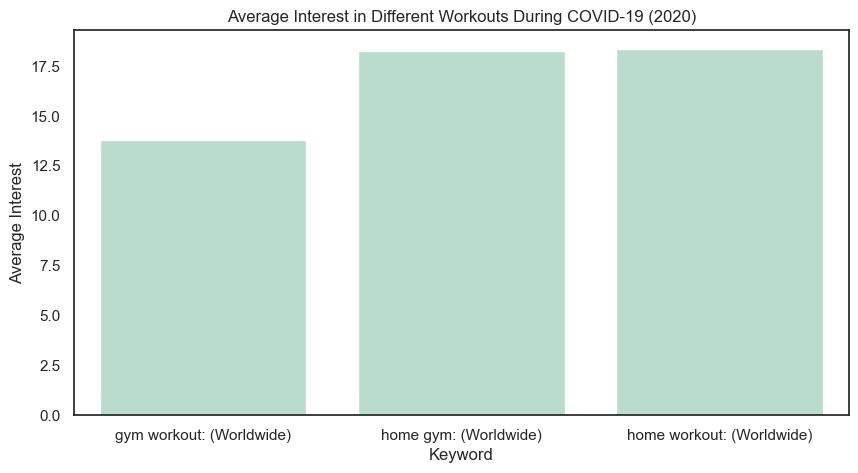

In [20]:
# Set the style for the plots
sns.set(style='white', palette='Pastel2')

# Ensure 'week' column is datetime
workout_df['week'] = pd.to_datetime(workout_df['week'])
three_keywords_df['week'] = pd.to_datetime(three_keywords_df['week'])

# 1. Visualize Overall Trends in workout_df
plt.figure(figsize=(12, 6))
sns.lineplot(data=workout_df, x='week', y='interest', hue='region')
plt.title('Global Interest in Workouts Over Time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend(title='Region')
plt.show()

# 2. Analyze Seasonality in workout_df
workout_df['month'] = workout_df['week'].dt.month
monthly_interest = workout_df.groupby('month')['interest'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_interest, x='month', y='interest')
plt.title('Average Monthly Interest in Workouts')
plt.xlabel('Month')
plt.ylabel('Average Interest')
plt.xticks(range(1, 13))
plt.show()

# 3. Compare Specific Keywords in three_keywords_df
plt.figure(figsize=(12, 6))
sns.lineplot(data=three_keywords_df, x='week', y='interest', hue='region')
plt.title('Interest in Home Workout, Gym Workout, and Home Gym Over Time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend(title='Keyword')
plt.show()

# Analyze interest during COVID-19 period (2020)
covid_period = three_keywords_df[(three_keywords_df['week'] >= '2020-01-01') & (three_keywords_df['week'] <= '2020-12-31')]
covid_interest = covid_period.groupby('region')['interest'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=covid_interest, x='region', y='interest')
plt.title('Average Interest in Different Workouts During COVID-19 (2020)')
plt.xlabel('Keyword')
plt.ylabel('Average Interest')
plt.show()